**IMPORTING LIBRARIES**

In [ ]:
# 🔹 Dataset & image loading utilities
from torchvision.datasets import ImageFolder    # For loading images from folders (structured by class)
from torchvision import transforms              # For image preprocessing & augmentation

# 🔹 DataLoader to batch and shuffle data
from torch.utils.data import DataLoader

# 🔹 Neural network and optimization
from torch import nn, optim

# 🔹 Visualization
import matplotlib.pyplot as plt

# 🔹 Core PyTorch
import torch


**TRAIN TRANSFORMATION**

In [ ]:
import torchvision.transforms as transforms

# 🔹 Define training transformations (augmentation + normalization)
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),                 # Resize all images to 128x128
    transforms.RandomHorizontalFlip(p=0.5),        # Randomly flip images horizontally
    transforms.RandomRotation(15),                 # Randomly rotate images by up to 15 degrees
    transforms.ColorJitter(                        # Randomly change brightness/contrast/saturation
        brightness=0.2,
        contrast=0.2,
        saturation=0.2
    ),
    transforms.ToTensor(),                         # Convert PIL image to PyTorch tensor (scales 0-1)
    transforms.Normalize((0.5, 0.5, 0.5))          # Normalize each channel (R,G,B)
])


**IMPORTING THE TRAINING IMAGE**

In [ ]:
dataset_train = ImageFolder('/kaggle/input/cloud-image-classification/clouds/clouds_train',
                            transform=train_transform)
dataset_train


Dataset ImageFolder
    Number of datapoints: 474
    Root location: /kaggle/input/cloud-image-classification/clouds/clouds_train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
           )

**LOADING THE IMAGE**

In [ ]:
data_loader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
data_loader_train


**SHAPE OF IMAGE**

In [ ]:
# Get one batch from the DataLoader
images, labels = next(iter(data_loader_train))

print("Batch image tensor shape:", images.shape)   # e.g. [1, 3, 128, 128] → (batch_size, channels, H, W)
print("Batch label tensor:", labels)               # Tensor of labels


In [ ]:
image, label = next(iter(data_loader_train))
print(image.shape)


torch.Size([1, 3, 128, 128])


**RESHAPING IMAGE**

In [ ]:
image = image.squeeze().permute(1, 2, 0)
image.shape


torch.Size([128, 128, 3])

**VIEWING IMAGE**

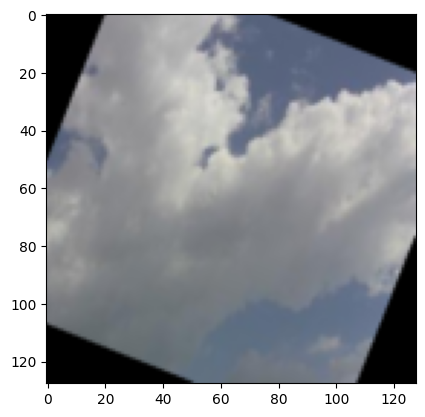

In [ ]:
plt.imshow(image)
plt.show()


**BUILDING A CONVULUTIONAL NEURAL NETWORK**

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
# Feature extractor: Convolutional layers to extract features from images
        self.feature_extractor = nn.Sequential(
        # First convolutional layer: 3 input channels (RGB), 16 output channels
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ELU(),  # Activation function for non-linearity
        nn.MaxPool2d(kernel_size=2),  # Downsampling: reduces spatial dimensions by half
        
        # Second convolutional layer: 16 input channels, 32 output channels
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ELU(),  # Activation function
        nn.MaxPool2d(kernel_size=2),  # Further downsampling
        
        # Third convolutional layer: 32 input channels, 64 output channels
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ELU(),  # Activation function
        nn.MaxPool2d(kernel_size=2),  # Final downsampling

        nn.AdaptiveAvgPool2d((4, 4)),
        nn.Flatten()  # Convert 2D feature maps to 1D vector for classification
    )

        self.classifier = nn.Sequential(
        nn.Linear(64 * 4 * 4, 128),  # 64 channels * 4 * 4
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, num_classes))
        
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return (x)


**LOSS FUNCTION AND OPTIMIZER**

In [103]:
net = Net(num_classes=7)  # Assuming 7 classes for classification
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(net.parameters(), lr=0.001)    # optimizer


**TRAINING LOOP**

In [ ]:
# Number of training epochs (how many times the model sees the whole dataset)
num_epochs = 100

for epoch in range(num_epochs):
    net.train()  #  Set the model to training mode (enables dropout, batchnorm, etc.)
    running_loss = 0.0  #  Initialize running loss for this epoch

    #  Iterate through batches from the training DataLoader
    for images, labels in data_loader_train:

        # Forward pass: send input images through the model to get predictions
        outputs = net(images)

        # Compute the loss between predictions and true labels
        loss = criterion(outputs, labels)

        # Backward + Optimization step
        optimizer.zero_grad()  #  Reset gradients (important!)
        loss.backward()        #  Backpropagation: compute gradients
        optimizer.step()       #  Update model parameters using optimizer

        # Accumulate batch loss
        running_loss += loss.item()

    #  Compute average loss across all batches in this epoch
    epoch_loss = running_loss / len(data_loader_train)

    #  Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/100], Loss: 1.7612
Epoch [2/100], Loss: 1.6334
Epoch [3/100], Loss: 1.5527
Epoch [4/100], Loss: 1.5413
Epoch [5/100], Loss: 1.4973
Epoch [6/100], Loss: 1.4212
Epoch [7/100], Loss: 1.3240
Epoch [8/100], Loss: 1.2387
Epoch [9/100], Loss: 1.2592
Epoch [10/100], Loss: 1.1580
Epoch [11/100], Loss: 1.1501
Epoch [12/100], Loss: 1.1740
Epoch [13/100], Loss: 1.0839
Epoch [14/100], Loss: 1.0511
Epoch [15/100], Loss: 0.9981
Epoch [16/100], Loss: 1.0371
Epoch [17/100], Loss: 1.0507
Epoch [18/100], Loss: 1.0469
Epoch [19/100], Loss: 0.9952
Epoch [20/100], Loss: 0.9803
Epoch [21/100], Loss: 0.9336
Epoch [22/100], Loss: 0.8909
Epoch [23/100], Loss: 0.9245
Epoch [24/100], Loss: 1.0062
Epoch [25/100], Loss: 0.9070
Epoch [26/100], Loss: 0.8063
Epoch [27/100], Loss: 0.8114
Epoch [28/100], Loss: 0.8767
Epoch [29/100], Loss: 0.8957
Epoch [30/100], Loss: 0.8223
Epoch [31/100], Loss: 0.9281
Epoch [32/100], Loss: 0.9170
Epoch [33/100], Loss: 0.7619
Epoch [34/100], Loss: 0.8466
Epoch [35/100], Loss: 0

**TEST IMAGES TRANSFORMATION**

In [ ]:
test_transform = transforms.Compose([
     transforms.ToTensor(),
    transforms.Resize((128, 128))
])


**IMPORTING THE TEST IMAGES**

In [ ]:
dataset_test = ImageFolder('/kaggle/input/cloud-image-classification/clouds/clouds_test',
                              transform=test_transform)

test_loader = DataLoader(dataset_test, batch_size=1, shuffle=False)


**EVALUATION MATRICES**

In [107]:
from torchmetrics import Accuracy, Precision, Recall, F1Score # Import metrics from torchmetrics
num_classes=7
metric_precision = Precision(task="multiclass", num_classes=num_classes, average="macro") # Precision metric for multiclass classification
metric_recall = Recall(task="multiclass", num_classes=num_classes, average="macro") # Recall metric for multiclass classification
metric_f1 = F1Score(task="multiclass", num_classes=num_classes, average="macro") # F1 Score metric for multiclass classification
metric_accuracy = Accuracy(task="multiclass", num_classes=num_classes, average="macro") # Accuracy metric for multiclass classification

print(metric_precision, metric_recall, metric_f1, metric_accuracy)


MulticlassPrecision() MulticlassRecall() MulticlassF1Score() MulticlassAccuracy()


**EVALUATION LOOP**

In [108]:
net.eval()
with torch.no_grad():
    # Loop through test set
    for images, labels in test_loader: # Assuming test_loader is your DataLoader for the test dataset
        outputs = net(images)   # Forward pass
        _, predicted = torch.max(outputs, 1) # Get predicted class

        # Update metrics
        metric_accuracy.update(predicted, labels) # Update accuracy metric
        metric_precision.update(predicted, labels) # Update precision metric
        metric_recall.update(predicted, labels) # Update recall metric
        metric_f1.update(predicted, labels) # Update F1 score metric

# Compute final values
Accuracy = metric_accuracy.compute() # Compute accuracy
precision = metric_precision.compute() # Compute precision
recall = metric_recall.compute() # Compute recall
f1_score = metric_f1.compute() # Compute F1 score

# Print results
print(f"Accuracy: {Accuracy:.4f}") # Print precision
print(f"Precision: {precision:.4f}") # Print precision
print(f"Recall: {recall:.4f}") # Print recall
print(f"F1 Score: {f1_score:.4f}") # Print F1 score


Accuracy: 0.7814
Precision: 0.8039
Recall: 0.7814
F1 Score: 0.7824


**VIEWING THE CONFUSION MATRIX**

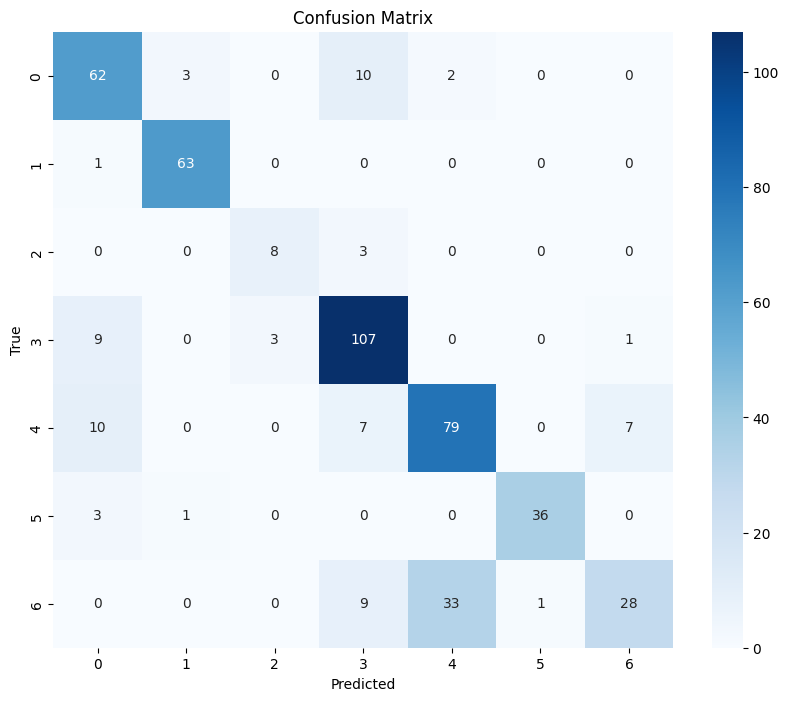

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

all_preds = [] # List to store all predictions
all_labels = [] # List to store all true labels

net.eval()
with torch.no_grad(): # Disable gradient calculation for inference
    for images, labels in test_loader: # Assuming test_loader is your DataLoader for the test dataset
        outputs = net(images)   # Forward pass
        _, predicted = torch.max(outputs, 1) # Get predicted class

        all_preds.extend(predicted.cpu().numpy()) # Store predictions
        all_labels.extend(labels.cpu().numpy()) # Store true labels
cm = confusion_matrix(all_labels, all_preds) # Compute confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


**CREATING A TRAIN LOADER AND A VALIDATION LOADER TO TEST MODEL**

In [ ]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset_train)) # 80% for training
val_size = len(dataset_train) - train_size # Remaining 20% for validation
train_subset, val_subset = random_split(dataset_train, [train_size, val_size]) # Split dataset into training and validation subsets

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True) # DataLoader for training subset
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False) # DataLoader for validation subset


**TRAIN AND VALIDATION LOSS VISUALS**

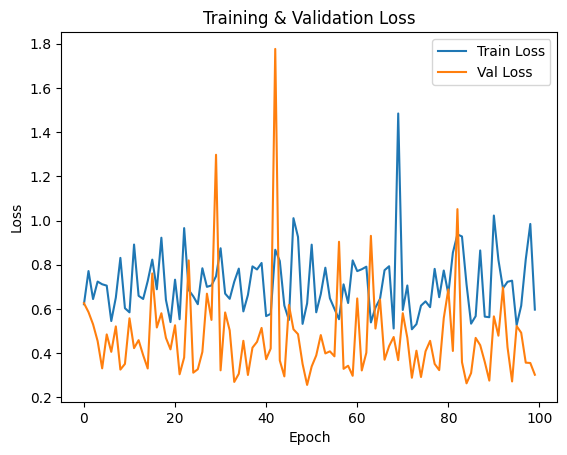

In [ ]:
train_losses, val_losses = [], [] # Lists to store losses

for epoch in range(num_epochs):       # Loop over epochs
    # --- Training ---
    net.train()        # Set model to training mode
    running_loss = 0.0        # Initialize running loss
    for images, labels in data_loader_train:        # Iterate over training data
        optimizer.zero_grad()        # Zero the gradients
        outputs = net(images)        # Forward pass
        loss = criterion(outputs, labels)        # Compute loss
        loss.backward()        # Backward pass
        optimizer.step()        # Update weights
        running_loss += loss.item() # Accumulate loss
    train_losses.append(running_loss / len(data_loader_train)) # Average training loss

    # --- Validation ---
    net.eval()       # Set model to evaluation mode
    val_loss = 0.0       # Initialize validation loss
    with torch.no_grad():   # Disable gradient calculation
        for images, labels in val_loader:     # Iterate over validation data
            outputs = net(images)     # Forward pass
            loss = criterion(outputs, labels)        # Compute loss
            val_loss += loss.item()        # Accumulate loss
    val_losses.append(val_loss / len(val_loader))        # Average validation loss

# Plot learning curves
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.show()


**SAVING THE MODEL**

In [112]:
torch.save(net.state_dict(), "cloud_classifier.pth") # Save model state

# Later, reload:
net = Net(num_classes)  # Assuming num_classes for classification
net.load_state_dict(torch.load("cloud_classifier.pth"))     # Load model state
net.eval()  # Set model to evaluation mode


Net(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ELU(alpha=1.0)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ELU(alpha=1.0)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): AdaptiveAvgPool2d(output_size=(4, 4))
    (10): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1024, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=7, bias=True)
  )
)

**MAKING A PREDICTION WITH A NEW IMAGE**

In [117]:
from PIL import Image

def predict_image(image_path, model, transform, class_names):   # Function to predict class of an image
    image = Image.open(image_path).convert("RGB")      # Open and convert image to RGB
    img_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():    # Disable gradient calculation
        outputs = model(img_tensor)     # Forward pass
        _, predicted = torch.max(outputs, 1)     # Get predicted class
    return class_names[predicted.item()]    # Return class name

print(predict_image("/kaggle/input/cloudimg/cloudimg.jpg", net, test_transform, dataset_train.classes))     # Predict class for a sample image


cirriform clouds
